In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('NHZ_whole.xlsx')

In [3]:
df.head()

,Region,Area,Timely sown,Seed,Grain appearance,Hectolitre weight,Protein content,Sedimentation value,Phenol test,Fe content,Zn content
0,Northern Hills Zone (NHZ),Almora,Irrigated Timely Sown,HPW349 (C),5.4,80.0,10.8,55.7,8.5,35.1,48.9
1,Northern Hills Zone (NHZ),Almora,Irrigated Timely Sown,VL907 (C),5.4,80.2,11.7,44.2,8.5,33.9,45.3
2,Northern Hills Zone (NHZ),Almora,Irrigated Timely Sown,HS507 (C),5.6,80.1,11.1,45.7,7.5,36.3,42.8
3,Northern Hills Zone (NHZ),Almora,Irrigated Timely Sown,HS562 (C),5.2,79.9,10.1,53.8,7.5,41.1,48.1
4,Northern Hills Zone (NHZ),Almora,Irrigated Timely Sown,VL2041,5.6,80.7,9.8,46.5,2.5,40.5,45.3


In [4]:
df.shape

(30, 11)

In [5]:
df.isnull().sum()

Region                 0
Area                   0
Timely sown            0
Seed                   0
Grain appearance       0
Hectolitre weight      0
Protein content        0
Sedimentation value    0
Phenol test            0
Fe content             0
Zn content             0
dtype: int64

In [6]:
df.iloc[:,9:]

,Fe content,Zn content
0,35.1,48.9
1,33.9,45.3
2,36.3,42.8
3,41.1,48.1
4,40.5,45.3
5,39.0,38.5
6,39.4,36.9
7,41.8,43.8
8,35.8,30.1
9,37.1,30.9


In [7]:
frame=pd.DataFrame(df.iloc[:,9:])

In [8]:
frame.head()

,Fe content,Zn content
0,35.1,48.9
1,33.9,45.3
2,36.3,42.8
3,41.1,48.1
4,40.5,45.3


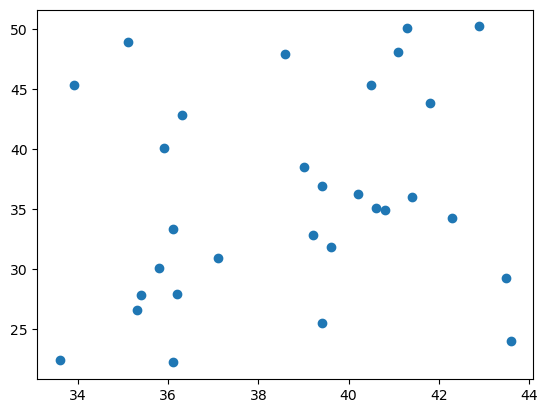

In [9]:
plt.scatter(frame['Fe content'],frame['Zn content'])
plt.show()

In [10]:
from sklearn.cluster import KMeans

In [11]:
k_rng=range(1,14)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(frame[['Fe content','Zn content']])
    sse.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

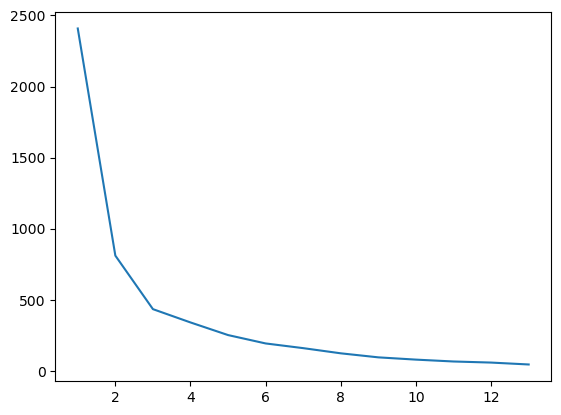

In [12]:
plt.plot(k_rng,sse)
plt.show()

In [13]:
import sklearn.metrics as metrics

In [14]:
kvalue=range(2,12)
sil=[]
for k in kvalue:
    km=KMeans(n_clusters=k)
    labels=km.fit_predict(frame[['Fe content','Zn content']])
    score=metrics.silhouette_score(frame[['Fe content','Zn content']],labels)
    sil.append(score)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

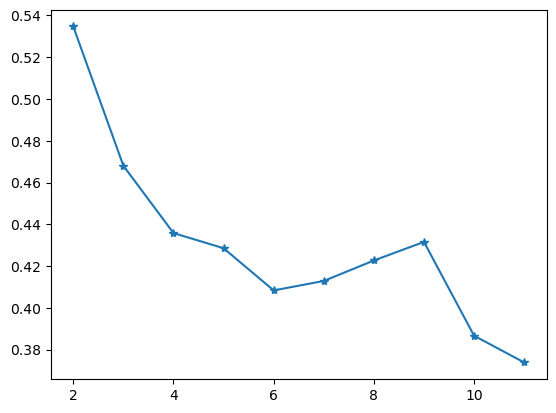

In [15]:

plt.plot(kvalue,sil,marker='*')
plt.show()

In [16]:
km=KMeans(n_clusters=2)
c=km.fit_predict(frame)
c

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
frame['cluster']=c
frame.head()

,Fe content,Zn content,cluster
0,35.1,48.9,0
1,33.9,45.3,0
2,36.3,42.8,0
3,41.1,48.1,0
4,40.5,45.3,0


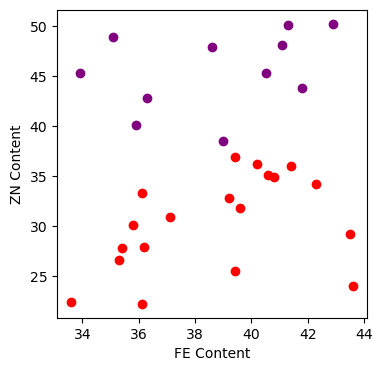

In [18]:
plt.figure(figsize=(4,4))
df1 = frame[frame.cluster==0]
df2 = frame[frame.cluster==1]
plt.scatter(df1['Fe content'],df1['Zn content'],color='purple')
plt.scatter(df2['Fe content'],df2['Zn content'],color='red')
plt.xlabel('FE Content')
plt.ylabel('ZN Content')
plt.show()

In [19]:
df['cluster']=c
df.head(95)

,Region,Area,Timely sown,Seed,Grain appearance,Hectolitre weight,Protein content,Sedimentation value,Phenol test,Fe content,Zn content,cluster
0,Northern Hills Zone (NHZ),Almora,Irrigated Timely Sown,HPW349 (C),5.4,80.0,10.8,55.7,8.5,35.1,48.9,0
1,Northern Hills Zone (NHZ),Almora,Irrigated Timely Sown,VL907 (C),5.4,80.2,11.7,44.2,8.5,33.9,45.3,0
2,Northern Hills Zone (NHZ),Almora,Irrigated Timely Sown,HS507 (C),5.6,80.1,11.1,45.7,7.5,36.3,42.8,0
3,Northern Hills Zone (NHZ),Almora,Irrigated Timely Sown,HS562 (C),5.2,79.9,10.1,53.8,7.5,41.1,48.1,0
4,Northern Hills Zone (NHZ),Almora,Irrigated Timely Sown,VL2041,5.6,80.7,9.8,46.5,2.5,40.5,45.3,0
5,Northern Hills Zone (NHZ),Shimla,Irrigated Timely Sown,HPW349 (C),5.4,80.6,10.8,46.5,7.5,39.0,38.5,0
6,Northern Hills Zone (NHZ),Shimla,Irrigated Timely Sown,VL907 (C),5.8,79.2,10.9,36.9,7.0,39.4,36.9,1
7,Northern Hills Zone (NHZ),Shimla,Irrigated Timely Sown,HS507 (C),5.6,79.9,11.3,41.9,7.0,41.8,43.8,0
8,Northern Hills Zone (NHZ),Shimla,Irrigated Timely Sown,HS562 (C),5.6,80.2,10.5,49.6,7.5,35.8,30.1,1
9,Northern Hills Zone (NHZ),Shimla,Irrigated Timely Sown,VL2041,5.4,79.6,9.9,40.7,4.0,37.1,30.9,1


In [20]:
df1.mean()

Fe content    38.763636
Zn content    45.545455
cluster        0.000000
dtype: float64

In [21]:
df2.mean()

Fe content    38.715789
Zn content    30.410526
cluster        1.000000
dtype: float64

In [22]:
df.to_csv('NHZ_whole.csv')

In [23]:
import numpy as np
# Calculate the standard deviation
standard_deviation = np.std(df1['Fe content'])

standard_deviation


2.9024355688636665

In [24]:
import numpy as np
# Calculate the standard deviation
standard_deviation = np.std(df1['Zn content'])

standard_deviation


3.762582197559069

In [25]:
import numpy as np
# Calculate the standard deviation
standard_deviation = np.std(df2['Fe content'])

standard_deviation


2.8910502840926777

In [26]:
import numpy as np
# Calculate the standard deviation
standard_deviation = np.std(df2['Zn content'])

standard_deviation


4.62030925563739